## USed for merging the 15 attraction dataset containing waiting times

In [127]:
import pandas as pd
import os
import re
%pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


### Merge files on Attraction -> output: Each excel for each attraction with cols ('Datetime', 'WaitTime', 'Month', 'Year')
### 0Attraction open
### -1Virtual Queue
### -2Maintenance
###  -3Closed due to weather
### -4Attraction closed
### 91over 90 minutes

In [128]:


# Folder with the Excel files
folder_path = "/home/ms/hfu/ML/ML_Presentation_Workspace/EU_PARK/europark_raw_files" # Corrected absolute path

# Regex to extract attraction, month, and year from filename
pattern = r'^(.*?) - Queue times in (\w+) (\d{4})\.xlsx'

# Dictionary to hold data for each attraction
attraction_data = {}

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.xlsx'):
        match = re.match(pattern, filename)
        if match:
            attraction = match.group(1).strip()
            month = match.group(2)
            year = int(match.group(3))
            file_path = os.path.join(folder_path, filename)

            # Read the file
            df = pd.read_excel(file_path)

            # Add metadata
            df['Month'] = month
            df['Year'] = year

            # Rename columns for consistency
            df.columns = ['Datetime', 'WaitTime', 'Month', 'Year']

            # Add to the attraction's list
            if attraction not in attraction_data:
                attraction_data[attraction] = []
            attraction_data[attraction].append(df)



In [129]:
attraction_data

{'ARTHUR': [              Datetime  WaitTime    Month  Year
  0     2023-01-01 09:45      -4.0  January  2023
  1     2023-01-01 09:46      -4.0  January  2023
  2     2023-01-01 09:47      -4.0  January  2023
  3     2023-01-01 09:48      -4.0  January  2023
  4     2023-01-01 09:49      -4.0  January  2023
  ...                ...       ...      ...   ...
  6556  2023-01-15 19:11      -4.0  January  2023
  6557  2023-01-15 19:12      -4.0  January  2023
  6558  2023-01-15 19:13      -4.0  January  2023
  6559  2023-01-15 19:14      -4.0  January  2023
  6560  2023-01-15 19:15      -4.0  January  2023
  
  [6561 rows x 4 columns],
                 Datetime  WaitTime   Month  Year
  0      2024-08-01 08:15      -4.0  August  2024
  1      2024-08-01 08:16      -4.0  August  2024
  2      2024-08-01 08:17      -4.0  August  2024
  3      2024-08-01 08:18      -4.0  August  2024
  4      2024-08-01 08:19      -4.0  August  2024
  ...                 ...       ...     ...   ...
  22134  2

In [130]:
# For each attraction, combine all months and save one Excel file
safe_attraction_name_list = []
save_path = '/home/ms/hfu/ML/ML_Presentation_Workspace/EU_PARK/europark_attraction_merged_dfs'
for attraction, dfs in attraction_data.items():
    combined_df = pd.concat(dfs, ignore_index=True)

    # Drop rows where Datetime is missing
    combined_df = combined_df.dropna(subset=['Datetime'])

    # Split Datetime into Date and Time using string operations
    combined_df[['Date', 'Time']] = combined_df['Datetime'].astype(str).str.strip().str.split(' ', expand=True)
    safe_attraction_name = attraction.replace('-', ' ')  # avoid file path issues # Create the output file path
    fil_safe_attraction_name = safe_attraction_name.replace(' ','_')
    safe_attraction_name_list.append(fil_safe_attraction_name)
    # print(safe_attraction_name_list)
    output_file = os.path.join(save_path, f"{fil_safe_attraction_name} - All Queue Times.xlsx")
    combined_df.to_excel(output_file, index=False)
    print(f"✅ Saved merged file for: {attraction} -> {output_file}")

✅ Saved merged file for: ARTHUR -> /home/ms/hfu/ML/ML_Presentation_Workspace/EU_PARK/europark_attraction_merged_dfs/ARTHUR - All Queue Times.xlsx


### Merge All attractions in one single excel file

In [131]:
# Folder where individual attraction Excel files are stored
folder_path = 'EU_PARK/europark_attraction_merged_dfs/'

# Get list of merged attraction files
files = [f for f in os.listdir(folder_path) if f.endswith('All Queue Times.xlsx')]
print(files)

['ARTHUR - All Queue Times.xlsx']


In [132]:
merged_df = None

In [133]:
for file in files:
    # Full path to the Excel file
    file_path = os.path.join(folder_path, file)

    # Extract attraction name from filename
    attraction = file.replace(' - All Queue Times.xlsx', '').strip()

    # Read file
    df = pd.read_excel(file_path)
    df = df.drop(columns=['Datetime'], errors='ignore')
    df.rename(columns={'WaitTime': f'{attraction}_WaitTime'}, inplace=True)

    # Merge using pandas only
    if merged_df is None:
        merged_df = df
    else:
        merged_df = pd.merge(merged_df, df, on=['Date', 'Time', 'Month', 'Year'], how='outer')

merged_df = merged_df.sort_values(by=['Date', 'Time'])

output_file = os.path.join(folder_path, 'All_Attractions_Queue_Times_By_Date_Time.csv')
merged_df.to_csv(output_file, index=False)

print(f"✅ Final merged file saved to: {output_file}")

✅ Final merged file saved to: EU_PARK/europark_attraction_merged_dfs/All_Attractions_Queue_Times_By_Date_Time.csv


In [134]:
merged_df_dt = pd.read_csv("EU_PARK/europark_attraction_merged_dfs/All_Attractions_Queue_Times_By_Date_Time.csv", index_col=False)

In [135]:
merged_df_dt.dropna()

,ARTHUR_WaitTime,Month,Year,Date,Time
0,-4.0,April,2022,2022-04-01,08:15
1,-4.0,April,2022,2022-04-01,08:20
2,-4.0,April,2022,2022-04-01,08:25
3,-4.0,April,2022,2022-04-01,08:30
4,-4.0,April,2022,2022-04-01,08:35
...,...,...,...,...,...
548707,-4.0,April,2025,2025-04-30,19:11
548708,-4.0,April,2025,2025-04-30,19:12
548709,-4.0,April,2025,2025-04-30,19:13
548710,-4.0,April,2025,2025-04-30,19:14


In [136]:
merged_df_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548715 entries, 0 to 548714
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ARTHUR_WaitTime  547261 non-null  float64
 1   Month            548715 non-null  object 
 2   Year             548715 non-null  int64  
 3   Date             548715 non-null  object 
 4   Time             547261 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 20.9+ MB


In [137]:
merged_df_dt.isna().sum()

ARTHUR_WaitTime    1454
Month                 0
Year                  0
Date                  0
Time               1454
dtype: int64

In [138]:
merged_df_dt = merged_df_dt.dropna(subset=['Time'])

In [139]:
def report_missing_values(df):
    total_rows = len(df)
    missing_count = df.isna().sum()
    missing_percent = (missing_count / total_rows) * 100

    result = pd.DataFrame({
        'Missing Count': missing_count,
        'Missing %': missing_percent.round(2)
    })
    result = result.sort_values(by='Missing %', ascending=False)

    print(result)  # Only show columns with missing values

report_missing_values(merged_df_dt)

                 Missing Count  Missing %
ARTHUR_WaitTime              0        0.0
Month                        0        0.0
Year                         0        0.0
Date                         0        0.0
Time                         0        0.0


In [140]:
#merged_df_dt.to_csv("EU_PARK/All_Attractions_Queue_Times_By_Date_Time.csv")

### Merge wind data files to one excel files contating wind data

In [141]:
def merge_fn_wind_prec_temp(df_path,df_type):
    """
    Parameters:
        df_path (str): Path to folder containing Excel files.
        data_type (str): Type of data ('wind', 'prec', 'temp', etc.)
        
    Returns:
        pd.DataFrame: Combined dataframe with Month and Year columns.
    """
    files = [f for f in os.listdir(df_path) if f.endswith('.xlsx')]
    data_final = []
    for file in files:
        file_path = os.path.join(df_path, file)

        # Extract month and year from filename: 'Wind speed in March 2024.xlsx'
        if df_type == 'wind':
            name_parts = file.replace('.xlsx', '').replace('Wind speed in ', '').strip().split()
        elif df_type == 'prec':
            name_parts = file.replace('.xlsx', '').replace('Precipitation probability in ', '').strip().split()
        elif df_type == 'temp':
            name_parts = file.replace('.xlsx', '').replace('Temperatures in ', '').strip().split()
        else:
            raise ValueError(f"Unknown data_type: {df_type}")
        month = name_parts[0]
        year = name_parts[1]

        # Read the file
        df = pd.read_excel(file_path)

        # Add Month and Year columns
        df['Month'] = month
        df['Year'] = int(year)
        data_final.append(df)

    # Combine all dataframes into one
    wind_df = pd.concat(data_final, ignore_index=True)
    wind_df[['Date', 'Time']] = wind_df['date_time'].astype(str).str.strip().str.split(' ', expand=True)
    wind_df = wind_df.drop(columns=['date_time'])

    return wind_df


In [142]:
wind_loc = 'EU_PARK/wind_speed/'
final_wind_df = merge_fn_wind_prec_temp(wind_loc,df_type='wind')

In [143]:
final_wind_df.shape

(464598, 5)

In [144]:
final_wind_df.head()

,wind_speed_in_kmh,Month,Year,Date,Time
0,10.0,December,2022,2022-12-01,09:45
1,10.0,December,2022,2022-12-01,09:46
2,10.0,December,2022,2022-12-01,09:47
3,10.0,December,2022,2022-12-01,09:48
4,10.0,December,2022,2022-12-01,09:49


In [145]:
report_missing_values(final_wind_df)

                   Missing Count  Missing %
wind_speed_in_kmh            836       0.18
Time                         836       0.18
Month                          0       0.00
Year                           0       0.00
Date                           0       0.00


In [146]:
import os
print(os.getcwd())

/home/ms/hfu/ML/ML_Presentation_Workspace


### Merge Precipitation data files to one excel files contating Precipitation data

In [147]:
precipitation_loc = '/home/ms/hfu/ML/ML_Presentation_Workspace/EU_PARK/Precipitation/'

if not os.path.exists(precipitation_loc):
	raise FileNotFoundError(f"Directory does not exist: {precipitation_loc}")

final_prec_df = merge_fn_wind_prec_temp(precipitation_loc,df_type='prec')


In [148]:
final_prec_df.shape

(464598, 5)

In [149]:
final_prec_df.head()

,precipitation_in_percent,Month,Year,Date,Time
0,20.0,November,2024,2024-11-01,08:15
1,20.0,November,2024,2024-11-01,08:16
2,20.0,November,2024,2024-11-01,08:17
3,20.0,November,2024,2024-11-01,08:18
4,20.0,November,2024,2024-11-01,08:19


In [150]:
report_missing_values(final_prec_df)

                          Missing Count  Missing %
precipitation_in_percent            836       0.18
Time                                836       0.18
Month                                 0       0.00
Year                                  0       0.00
Date                                  0       0.00


### Merge Temperature data files to one excel files contating Temperature data

In [151]:
temperature_loc = 'EU_PARK/Temperatures/'
final_temp_df = merge_fn_wind_prec_temp(temperature_loc,df_type='temp')


In [152]:
final_temp_df.shape

(464598, 5)

In [153]:
final_temp_df.head()

,temperature_in_celsius,Month,Year,Date,Time
0,8.9,April,2024,2024-04-01,08:15
1,8.9,April,2024,2024-04-01,08:16
2,8.9,April,2024,2024-04-01,08:17
3,8.9,April,2024,2024-04-01,08:18
4,8.9,April,2024,2024-04-01,08:19


In [154]:
report_missing_values(final_temp_df)

                        Missing Count  Missing %
temperature_in_celsius            836       0.18
Time                              836       0.18
Month                               0       0.00
Year                                0       0.00
Date                                0       0.00


### Merge Final Excel of waiting times with wind data, Precipitaiton and Temperature data based on Month ,year,Date Time

In [155]:
# merged_df_dt : final df for all attraction waiting times
# final_temp_df: final df for all attraction Temperatures
# final_prec_df: final df for all attraction Precipitation
# final_wind_df: final df for all attraction Wind speed in kmh

In [156]:
merge_keys = ['Month', 'Year', 'Date', 'Time']


In [157]:
# Step-by-step outer merges using pandas only
merged = pd.merge(merged_df_dt, final_temp_df, on=['Month', 'Year', 'Date', 'Time'], how='outer')
merged = pd.merge(merged, final_prec_df, on=['Month', 'Year', 'Date', 'Time'], how='outer')
merged = pd.merge(merged, final_wind_df, on=['Month', 'Year', 'Date', 'Time'], how='outer')

# Optional: sort for clean structure
final_merged = merged.sort_values(by=['Year', 'Month', 'Date', 'Time']).reset_index(drop=True)



In [158]:
final_merged.shape

(549604, 8)

In [159]:
report_missing_values(final_merged)

                          Missing Count  Missing %
temperature_in_celsius            85828      15.62
precipitation_in_percent          85828      15.62
wind_speed_in_kmh                 85828      15.62
ARTHUR_WaitTime                    2336       0.43
Time                                836       0.15
Month                                 0       0.00
Year                                  0       0.00
Date                                  0       0.00


In [160]:
final_merged.columns

Index(['ARTHUR_WaitTime', 'Month', 'Year', 'Date', 'Time',
       'temperature_in_celsius', 'precipitation_in_percent',
       'wind_speed_in_kmh'],
      dtype='object')

In [161]:
gb = final_merged.groupby(['Month', 'Year', 'ARTHUR_WaitTime']).agg(lambda x: x.isna().sum())

In [162]:
gb

Date  Time  temperature_in_celsius  \
Month     Year ARTHUR_WaitTime                                       
April     2022 -4.0                0     0                     382   
               -3.0                0     0                      39   
                1.0                0     0                     422   
                5.0                0     0                     239   
                10.0               0     0                     124   
...                              ...   ...                     ...   
September 2024  45.0               0     0                       0   
                50.0               0     0                       0   
                55.0               0     0                       0   
                60.0               0     0                       0   
                65.0               0     0                       0   

                                precipitation_in_percent  wind_speed_in_kmh  
Month     Year ARTHUR_WaitTime                                               
April     2022 -4.0                                  382                382  
               -3.0                                   39                 39  
                1.0                                  422                422  
                5.0                                  239                239  
                10.0                                 124                124  
...                                                  ...                ...  
September 2024  45.0                                   0                  0  
                50.0                                   0                  0  
                55.0                                   0                  0  
                60.0                                   0                  0  
                65.0                                   0                  0  

[598 rows x 5 columns]

In [163]:
final_merged.columns

Index(['ARTHUR_WaitTime', 'Month', 'Year', 'Date', 'Time',
       'temperature_in_celsius', 'precipitation_in_percent',
       'wind_speed_in_kmh'],
      dtype='object')

In [164]:
final_merged.to_csv("final_df.csv")

In [165]:
final_merged.groupby

<bound method DataFrame.groupby of         ARTHUR_WaitTime  Month  Year        Date   Time  \
0                  -4.0  April  2022  2022-04-01  08:15   
1                  -4.0  April  2022  2022-04-01  08:20   
2                  -4.0  April  2022  2022-04-01  08:25   
3                  -4.0  April  2022  2022-04-01  08:30   
4                  -4.0  April  2022  2022-04-01  08:35   
...                 ...    ...   ...         ...    ...   
549599             -4.0  March  2025  2025-03-31  18:11   
549600             -4.0  March  2025  2025-03-31  18:12   
549601             -4.0  March  2025  2025-03-31  18:13   
549602             -4.0  March  2025  2025-03-31  18:14   
549603             -4.0  March  2025  2025-03-31  18:15   

        temperature_in_celsius  precipitation_in_percent  wind_speed_in_kmh  
0                          NaN                       NaN                NaN  
1                          NaN                       NaN                NaN  
2                     

In [166]:
df = pd.read_csv(output_file)

In [167]:
report_missing_values(df)

                 Missing Count  Missing %
ARTHUR_WaitTime           1454       0.26
Time                      1454       0.26
Month                        0       0.00
Year                         0       0.00
Date                         0       0.00


### Add a column for school holiday = 0 or 1 (true or false)

In [168]:
school_holiday_df = pd.read_csv('/home/ms/hfu/ML/ML_Presentation_Workspace/EU_PARK/holidays/baden_wuerttemberg_school_holidays_2022_2026.csv')

In [169]:
school_holiday_df.columns

Index(['Date', 'Holiday'], dtype='object')

In [170]:
school_holiday_df.shape

(360, 2)

In [171]:
school_holiday_df.head()

,Date,Holiday
0,2022-01-01,Christmas
1,2022-01-02,Christmas
2,2022-01-03,Christmas
3,2022-01-04,Christmas
4,2022-01-05,Christmas


## Merge school holidays into final_merged


In [172]:
import pandas as pd

# 1. Convert both Date columns to datetime (if not already)
school_holiday_df['Date'] = pd.to_datetime(school_holiday_df['Date'])
final_merged['Date'] = pd.to_datetime(final_merged['Date'], errors='coerce')

# 2. Do a left-merge with indicator
final_merged = pd.merge(
    final_merged,
    school_holiday_df[['Date']],    # only need the Date column
    on='Date',
    how='left',
    indicator=True                  # adds a '_merge' column
)

# 3. Create the flag column (1 if holiday, 0 otherwise)
final_merged['Is_School_Holiday'] = (final_merged['_merge'] == 'both').astype(int)

# 4. Drop the helper '_merge' column
final_merged.drop(columns=['_merge'], inplace=True)

# 5. (Optional) inspect result
print(final_merged[['Date', 'Is_School_Holiday']].drop_duplicates().head())

          Date  Is_School_Holiday
0   2022-04-01                  0
121 2022-04-02                  0
248 2022-04-03                  0
375 2022-04-04                  0
496 2022-04-05                  0


In [173]:
final_merged.columns

Index(['ARTHUR_WaitTime', 'Month', 'Year', 'Date', 'Time',
       'temperature_in_celsius', 'precipitation_in_percent',
       'wind_speed_in_kmh', 'Is_School_Holiday'],
      dtype='object')

In [174]:
final_merged.to_csv("final_df.csv")

### Add column for public holiday =1 or 0

In [175]:
public_holiday_df = pd.read_csv('/home/ms/hfu/ML/ML_Presentation_Workspace/EU_PARK/holidays/baden_wuerttemberg_public_holidays_2022_2025.csv')

In [176]:
public_holiday_df.columns

Index(['Holiday Name', 'Date', 'Year'], dtype='object')

In [177]:
public_holiday_df.head()


,Holiday Name,Date,Year
0,New Year's Day,2022-01-01 00:00:00,2022
1,Epiphany,2022-01-06 00:00:00,2022
2,Good Friday,2022-04-15 00:00:00,2022
3,Easter Monday,2022-04-18 00:00:00,2022
4,Labour Day,2022-05-01 00:00:00,2022


In [178]:


# 1. Convert both Date columns to datetime (if not already)
public_holiday_df['Date'] = pd.to_datetime(school_holiday_df['Date'])
final_merged['Date'] = pd.to_datetime(final_merged['Date'], errors='coerce')

# 2. Do a left-merge with indicator
final_merged = pd.merge(
    final_merged,
    public_holiday_df[['Date']],    # only need the Date column
    on='Date',
    how='left',
    indicator=True                  # adds a '_merge' column
)

# 3. Create the flag column (1 if holiday, 0 otherwise)
final_merged['Is_Public_Holiday'] = (final_merged['_merge'] == 'both').astype(int)

# 4. Drop the helper '_merge' column
final_merged.drop(columns=['_merge'], inplace=True)

# 5. (Optional) inspect result
print(final_merged[['Date', 'Is_Public_Holiday']].drop_duplicates().head())

          Date  Is_Public_Holiday
0   2022-04-01                  0
121 2022-04-02                  0
248 2022-04-03                  0
375 2022-04-04                  0
496 2022-04-05                  0


In [179]:
final_merged.columns

Index(['ARTHUR_WaitTime', 'Month', 'Year', 'Date', 'Time',
       'temperature_in_celsius', 'precipitation_in_percent',
       'wind_speed_in_kmh', 'Is_School_Holiday', 'Is_Public_Holiday'],
      dtype='object')

In [180]:
final_merged.to_csv("final_df.csv")

###EDA

In [181]:
final_merged.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549604 entries, 0 to 549603
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   ARTHUR_WaitTime           547268 non-null  float64       
 1   Month                     549604 non-null  object        
 2   Year                      549604 non-null  int64         
 3   Date                      548768 non-null  datetime64[ns]
 4   Time                      548768 non-null  object        
 5   temperature_in_celsius    463776 non-null  float64       
 6   precipitation_in_percent  463776 non-null  float64       
 7   wind_speed_in_kmh         463776 non-null  float64       
 8   Is_School_Holiday         549604 non-null  int64         
 9   Is_Public_Holiday         549604 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 41.9+ MB


In [182]:
final_merged.head()


,ARTHUR_WaitTime,Month,Year,Date,Time,temperature_in_celsius,precipitation_in_percent,wind_speed_in_kmh,Is_School_Holiday,Is_Public_Holiday
0,-4.0,April,2022,2022-04-01,08:15,NaN,NaN,NaN,0,0
1,-4.0,April,2022,2022-04-01,08:20,NaN,NaN,NaN,0,0
2,-4.0,April,2022,2022-04-01,08:25,NaN,NaN,NaN,0,0
3,-4.0,April,2022,2022-04-01,08:30,NaN,NaN,NaN,0,0
4,-4.0,April,2022,2022-04-01,08:35,NaN,NaN,NaN,0,0


In [183]:
final_merged.tail()


,ARTHUR_WaitTime,Month,Year,Date,Time,temperature_in_celsius,precipitation_in_percent,wind_speed_in_kmh,Is_School_Holiday,Is_Public_Holiday
549599,-4.0,March,2025,2025-03-31,18:11,11.9,10.0,15.0,0,0
549600,-4.0,March,2025,2025-03-31,18:12,11.9,10.0,15.0,0,0
549601,-4.0,March,2025,2025-03-31,18:13,11.9,10.0,15.0,0,0
549602,-4.0,March,2025,2025-03-31,18:14,11.9,10.0,15.0,0,0
549603,-4.0,March,2025,2025-03-31,18:15,11.9,10.0,15.0,0,0


In [184]:
final_merged.shape

(549604, 10)

In [185]:
final_merged.describe()

,ARTHUR_WaitTime,Year,Date,temperature_in_celsius,precipitation_in_percent,wind_speed_in_kmh,Is_School_Holiday,Is_Public_Holiday
count,547268.000000,549604.000000,548768,463776.000000,463776.000000,463776.000000,549604.000000,549604.000000
mean,24.365812,2023.231501,2023-10-27 12:57:01.878826752,15.718453,26.695064,13.889572,0.311603,0.028937
min,-4.000000,2022.000000,2022-04-01 00:00:00,-8.100000,0.000000,5.000000,0.000000,0.000000
25%,15.000000,2023.000000,2023-01-08 00:00:00,10.200000,10.000000,5.000000,0.000000,0.000000
50%,25.000000,2023.000000,2023-10-11 00:00:00,15.600000,30.000000,10.000000,0.000000,0.000000
75%,35.000000,2024.000000,2024-07-25 00:00:00,21.600000,30.000000,15.000000,1.000000,0.000000
max,91.000000,2025.000000,2025-04-30 00:00:00,36.300000,95.000000,70.000000,1.000000,1.000000
std,15.866329,0.888536,NaN,7.772595,19.392560,11.390221,0.463149,0.167630


In [186]:
final_merged.describe(include='all')

,ARTHUR_WaitTime,Month,Year,Date,Time,temperature_in_celsius,precipitation_in_percent,wind_speed_in_kmh,Is_School_Holiday,Is_Public_Holiday
count,547268.000000,549604,549604.000000,548768,548768,463776.000000,463776.000000,463776.000000,549604.000000,549604.000000
unique,NaN,11,NaN,NaN,962,NaN,NaN,NaN,NaN,NaN
top,NaN,August,NaN,NaN,11:05,NaN,NaN,NaN,NaN,NaN
freq,NaN,64994,NaN,NaN,911,NaN,NaN,NaN,NaN,NaN
mean,24.365812,NaN,2023.231501,2023-10-27 12:57:01.878826752,NaN,15.718453,26.695064,13.889572,0.311603,0.028937
min,-4.000000,NaN,2022.000000,2022-04-01 00:00:00,NaN,-8.100000,0.000000,5.000000,0.000000,0.000000
25%,15.000000,NaN,2023.000000,2023-01-08 00:00:00,NaN,10.200000,10.000000,5.000000,0.000000,0.000000
50%,25.000000,NaN,2023.000000,2023-10-11 00:00:00,NaN,15.600000,30.000000,10.000000,0.000000,0.000000
75%,35.000000,NaN,2024.000000,2024-07-25 00:00:00,NaN,21.600000,30.000000,15.000000,1.000000,0.000000
max,91.000000,NaN,2025.000000,2025-04-30 00:00:00,NaN,36.300000,95.000000,70.000000,1.000000,1.000000


In [188]:
report_missing_values(final_merged)

                          Missing Count  Missing %
temperature_in_celsius            85828      15.62
precipitation_in_percent          85828      15.62
wind_speed_in_kmh                 85828      15.62
ARTHUR_WaitTime                    2336       0.43
Date                                836       0.15
Time                                836       0.15
Month                                 0       0.00
Year                                  0       0.00
Is_School_Holiday                     0       0.00
Is_Public_Holiday                     0       0.00


### Data visualization

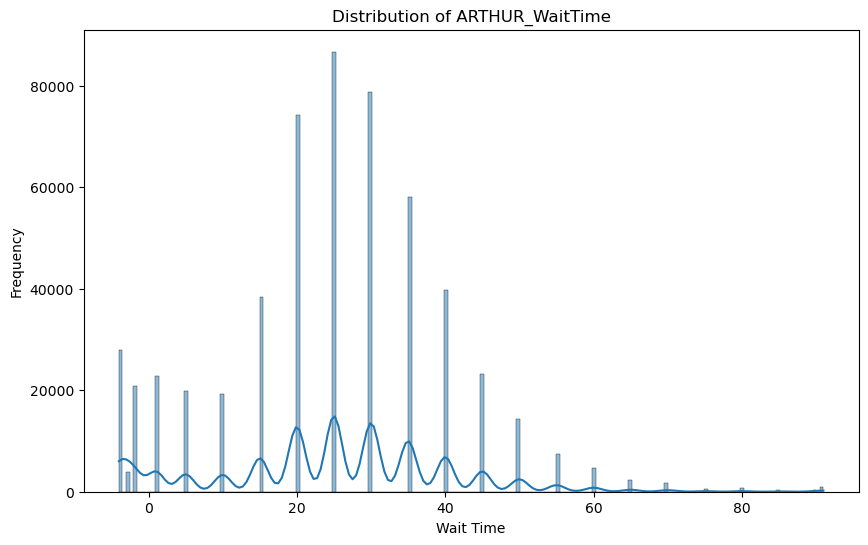

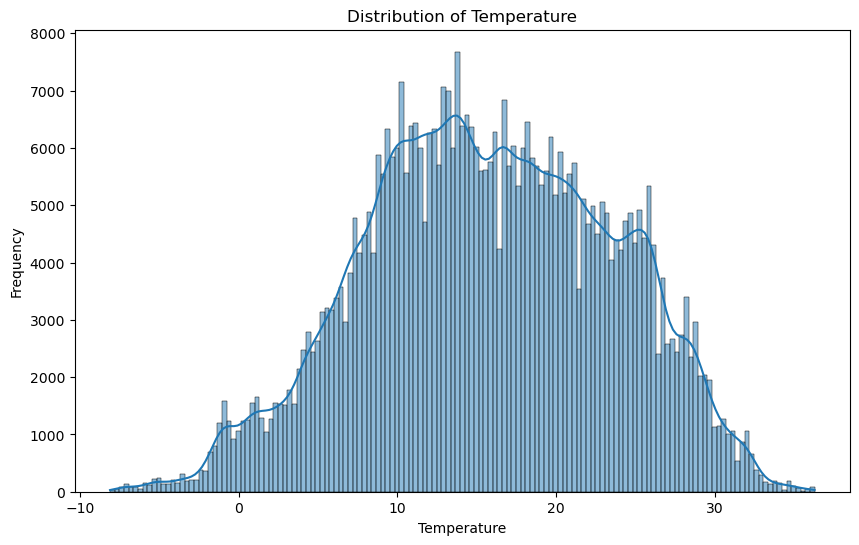

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns
# filepath: /home/ms/hfu/ML/ML_Presentation_Workspace/merge_df.ipynb
# Add to a new cell
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Histogram for a wait time column (replace with an actual column name)
# Identify wait time columns first
wait_time_columns = [col for col in final_merged.columns if 'WaitTime' in col]
if wait_time_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(final_merged[wait_time_columns[0]].dropna(), kde=True)
    plt.title(f'Distribution of {wait_time_columns[0]}')
    plt.xlabel('Wait Time')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("No wait time columns found to plot.")


# Example: Histogram for Temperature (if 'Temperature' column exists)
if 'temperature_in_celsius' in final_merged.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(final_merged['temperature_in_celsius'].dropna(), kde=True)
    plt.title('Distribution of Temperature')
    plt.xlabel('Temperature')
    plt.ylabel('Frequency')
    plt.show()
elif 'temp_value' in final_merged.columns: # Based on your merge_fn_wind_prec_temp
    plt.figure(figsize=(10, 6))
    sns.histplot(final_merged['temp_value'].dropna(), kde=True)
    plt.title('Distribution of Temperature (temp_value)')
    plt.xlabel('Temperature')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("No 'Temperature' or 'temp_value' column found to plot.")



### Exploring Relationships Between Variables
Let's examine how different variables relate to each other, particularly how weather conditions, holidays, and other factors might affect wait times.

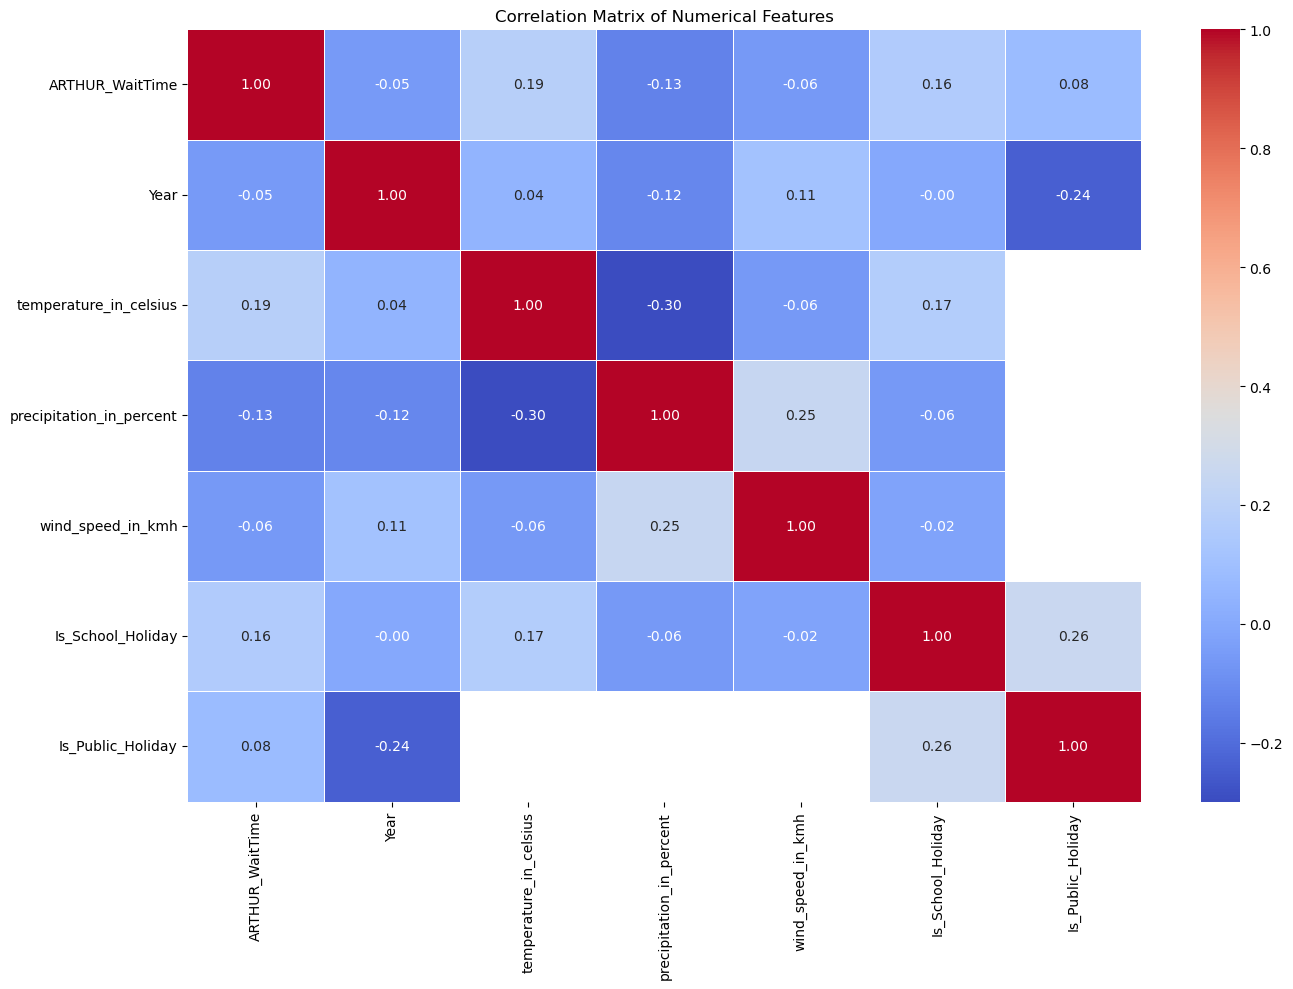

In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for correlation analysis
# First, identify the numeric columns in the dataframe
numeric_cols = final_merged.select_dtypes(include=[np.number]).columns.tolist()

# Remove unnecessary numeric columns (like index) if they exist
exclude_cols = []  # Add columns to exclude if needed
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

# Create a correlation matrix for these numeric columns
if numeric_cols:
    correlation_matrix = final_merged[numeric_cols].corr(method='pearson', numeric_only=True)
    
    # Plot the correlation matrix
    plt.figure(figsize=(14, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Matrix of Numerical Features')
    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns found for correlation analysis")

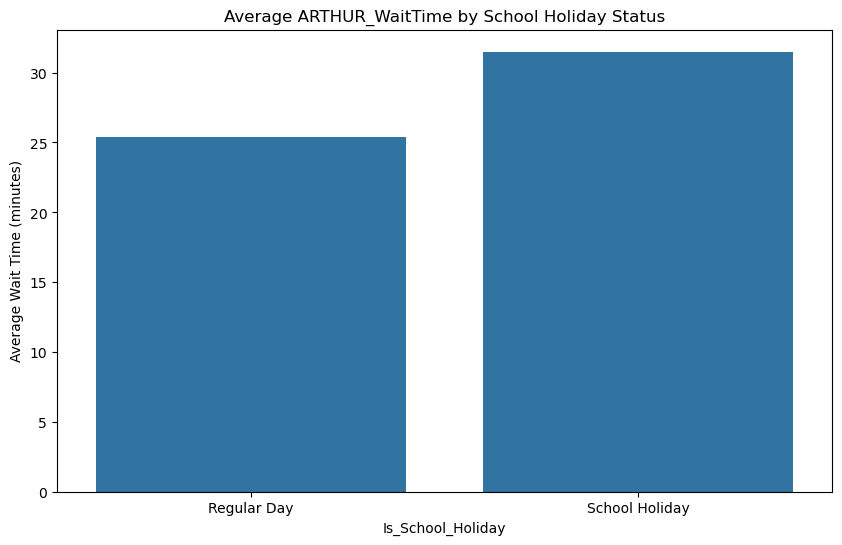

Wait time statistics by school holiday status:
  Is_School_Holiday       mean  median        std
0       Regular Day  25.396353    25.0  14.020469
1    School Holiday  31.504211    30.0  12.138321


In [203]:
# Explore relationship between wait time and holidays
wait_time_columns = [col for col in final_merged.columns if 'WaitTime' in col]
if wait_time_columns and 'Is_School_Holiday' in final_merged.columns:
    # Pick a representative wait time column
    wait_col = wait_time_columns[0]
    
    # Filter out values < 0 (probably maintenance or closed)
    df_filtered = final_merged[final_merged[wait_col] >= 0].copy()
    
    # Calculate average wait time on school holidays vs regular days
    avg_by_holiday = df_filtered.groupby('Is_School_Holiday')[wait_col].agg(['mean', 'median', 'std']).reset_index()
    avg_by_holiday['Is_School_Holiday'] = avg_by_holiday['Is_School_Holiday'].map({0: 'Regular Day', 1: 'School Holiday'})
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Is_School_Holiday', y='mean', data=avg_by_holiday)
    plt.title(f'Average {wait_col} by School Holiday Status')
    plt.ylabel('Average Wait Time (minutes)')
    plt.show()
    
    print(f"Wait time statistics by school holiday status:\n{avg_by_holiday}")

/tmp/ipykernel_340526/2252718740.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_time['Hour'] = pd.to_datetime(df_time['Time']).dt.hour


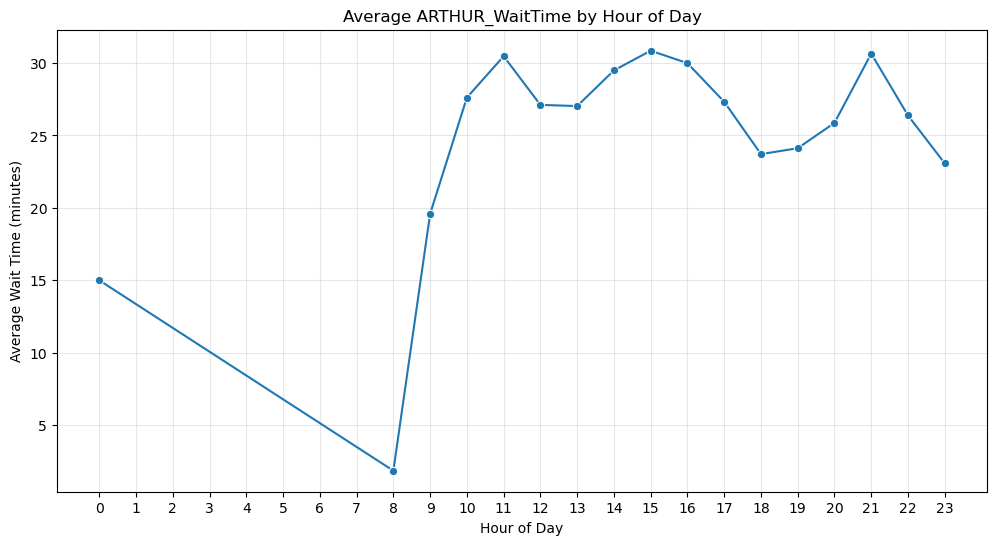

In [206]:
# Explore wait time by time of day
if wait_time_columns and 'Time' in final_merged.columns:
    # Extract hour from time column
    df_time = final_merged.copy()
    try:
        # Try to extract hour directly if Time is already properly formatted
        df_time['Hour'] = pd.to_datetime(df_time['Time']).dt.hour
    except:
        # If that fails, try a different approach assuming 'Time' is a string like '10:30'
        df_time['Hour'] = df_time['Time'].str.split(':', expand=True)[0].astype(int)
    
    # Filter out negative wait times
    wait_col = wait_time_columns[0]
    df_time = df_time[df_time[wait_col] >= 0]
    
    # Group by hour and calculate average wait time
    hourly_avg = df_time.groupby('Hour')[wait_col].mean().reset_index()
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Hour', y=wait_col, data=hourly_avg, marker='o')
    plt.title(f'Average {wait_col} by Hour of Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('Average Wait Time (minutes)')
    plt.xticks(range(0, 24))
    plt.grid(True, alpha=0.3)
    plt.show()

In [208]:
# Explore the relationship between weather and wait times
if wait_time_columns and 'temp_value' in final_merged.columns:
    wait_col = wait_time_columns[0]
    df_filtered = final_merged[(final_merged[wait_col] >= 0) & (~final_merged['temp_value'].isna())].copy()
    
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='temp_value', y=wait_col, data=df_filtered, alpha=0.5)
    plt.title(f'Relationship Between Temperature and {wait_col}')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Wait Time (minutes)')
    
    # Add a trend line
    sns.regplot(x='temp_value', y=wait_col, data=df_filtered, scatter=False, color='red')
    plt.show()
    
    # Calculate correlation
    correlation = df_filtered[['temp_value', wait_col]].corr().iloc[0, 1]
    print(f"Correlation between temperature and {wait_col}: {correlation:.3f}")